<a href="https://colab.research.google.com/github/Hongjieun123/deeplearning-project/blob/master/%EC%BC%80%EB%9D%BC%EC%8A%A4(%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

영화 리뷰 분류: 이진 분류 예제

In [0]:
#데이터 가져오기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)
# num_words = 10000은 훈련데이터에서 가장 자주 나타나는 단어 1만개만 사용하겠다는 소리
# 각 labels 은 긍정은 1, 부정은 0으로 나타내었다. 


In [17]:
train_data.shape

(25000,)

리스트를 one-hot encoding 하여 0과 1 벡터로 변환한다. 
10000개와 같은 크기의 벡터를 0으로 채우고, 있는 단어 인덱스에만 1을 넣는 방식입니다. 리뷰가 10000 단어 이하라면 2번의 경우가 더 메모리를 많이 사용하는 것 입니다.

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#레이블 벡터 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
print(x_train.shape)

(25000, 10000)


신경망 모델 만들기

입력 데이터가 벡터고, 레이블은 스칼라이다.
이런 문제에서는 relu 함수 사용한 완전연결층

In [0]:
#16개의 은닉 유닛을 가진 2개의 층
#현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세번째 층

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
#손실함수와 옵티마이저 선택(기본값)
#이진 분류 문제 + 확률 출력 : binary_crossentropy 사용
#rmsprop 옵티마이저 사용
#측정지표 accuracy

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#옵티마이저 custom 가능
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [0]:
#처음본 데이터에 대한 모델의 정확도를 측정하기 위해서
#원본 훈련 데이터에서 10000개의 샘플을 떼어 검증 세트를 만들어야 한다.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.5492 - accuracy: 0.7797 - val_loss: 0.4325 - val_accuracy: 0.8552
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.3417 - accuracy: 0.8943 - val_loss: 0.3264 - val_accuracy: 0.8820
Epoch 3/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.2495 - accuracy: 0.9221 - val_loss: 0.2874 - val_accuracy: 0.8903
Epoch 4/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1961 - accuracy: 0.9373 - val_loss: 0.2800 - val_accuracy: 0.8881
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1595 - accuracy: 0.9497 - val_loss: 0.3087 - val_accuracy: 0.8775
Epoch 6/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1327 - accuracy: 0.9579 - val_loss: 0.2872 - val_accuracy: 0.8877
Epoch 7/20
15000/15000 [==============================] - 1s 96us/s

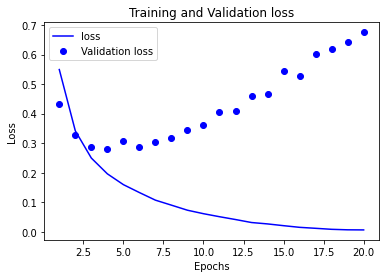

In [37]:
#matplotliab으로 그래프 그려 결과 확인하기

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1) 

plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

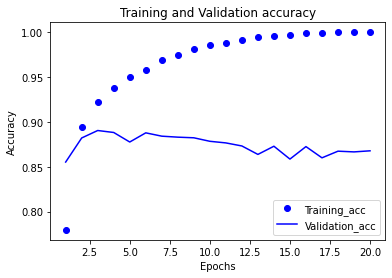

In [39]:
#훈련과 검증 손실

plt.clf()  #그래프를 초기화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()



overfitting 발생

In [48]:
#모델 다시 훈련
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Train on 25000 samples, validate on 10000 samples
Epoch 1/2
25000/25000 [==============================] - 2s 87us/step - loss: 0.4668 - accuracy: 0.8183 - val_loss: 0.2996 - val_accuracy: 0.9033
Epoch 2/2
25000/25000 [==============================] - 2s 61us/step
[0.2882976700401306, 0.889240026473999]


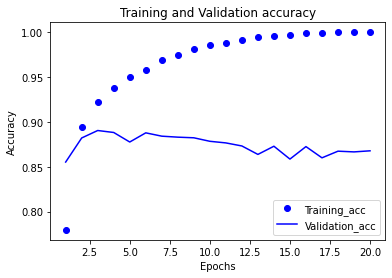